In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/FLIGHT-2015.csv')
df.head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_TIME
0,545,545,0,100,413,725,705,65
1,1620,1618,-2,108,554,1808,1752,73
2,1513,1519,6,181,1024,1714,1702,147
3,1302,1258,-4,73,331,1415,1410,51
4,645,638,-7,155,889,820,758,127


from matplotlib import pyplot as plt
_df_0['SCHEDULED_DEPARTURE'].plot(kind='hist', bins=20, title='SCHEDULED_DEPARTURE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['DEPARTURE_TIME'].plot(kind='hist', bins=20, title='DEPARTURE_TIME')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['DEPARTURE_DELAY'].plot(kind='hist', bins=20, title='DEPARTURE_DELAY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SCHEDULED_TIME'].plot(kind='hist', bins=20, title='SCHEDULED_TIME')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='SCHEDULED_DEPARTURE', y='DEPARTURE_TIME', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='DEPARTURE_TIME', y='DEPARTURE_DELAY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='DEPARTURE_DELAY', y='SCHEDULED_TIME', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='SCHEDULED_TIME', y='DISTANCE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DEPARTURE_TIME']
  ys = series['SCHEDULED_DEPARTURE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('DEPARTURE_TIME', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DEPARTURE_TIME')
_ = plt.ylabel('SCHEDULED_DEPARTURE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DEPARTURE_TIME']
  ys = series['DEPARTURE_DELAY']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('DEPARTURE_TIME', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DEPARTURE_TIME')
_ = plt.ylabel('DEPARTURE_DELAY')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DEPARTURE_TIME']
  ys = series['DISTANCE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('DEPARTURE_TIME', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DEPARTURE_TIME')
_ = plt.ylabel('DISTANCE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DEPARTURE_TIME']
  ys = series['SCHEDULED_ARRIVAL']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('DEPARTURE_TIME', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DEPARTURE_TIME')
_ = plt.ylabel('SCHEDULED_ARRIVAL')

from matplotlib import pyplot as plt
_df_12['SCHEDULED_DEPARTURE'].plot(kind='line', figsize=(8, 4), title='SCHEDULED_DEPARTURE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['DEPARTURE_TIME'].plot(kind='line', figsize=(8, 4), title='DEPARTURE_TIME')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['DEPARTURE_DELAY'].plot(kind='line', figsize=(8, 4), title='DEPARTURE_DELAY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['SCHEDULED_TIME'].plot(kind='line', figsize=(8, 4), title='SCHEDULED_TIME')
plt.gca().spines[['top', 'right']].set_visible(False)

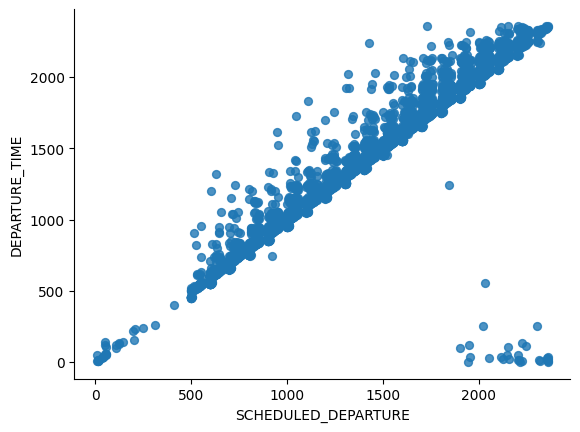

In [7]:
# @title SCHEDULED_DEPARTURE vs DEPARTURE_TIME

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SCHEDULED_DEPARTURE', y='DEPARTURE_TIME', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

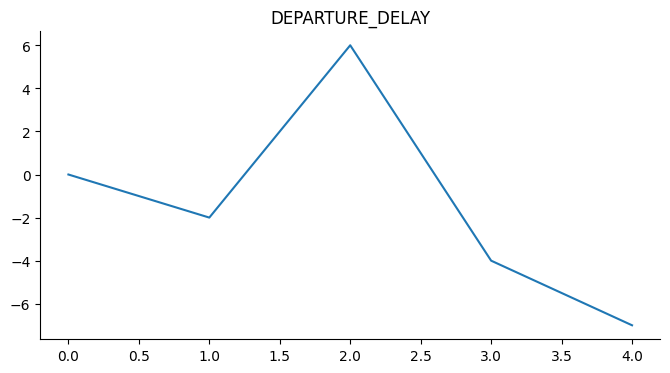

In [5]:
_df_14['DEPARTURE_DELAY'].plot(kind='line', figsize=(8, 4), title='DEPARTURE_DELAY')
plt.gca().spines[['top', 'right']].set_visible(False)

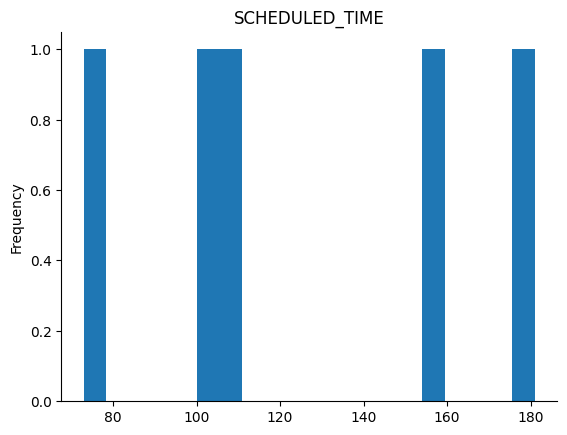

In [6]:
_df_3['SCHEDULED_TIME'].plot(kind='hist', bins=20, title='SCHEDULED_TIME')
plt.gca().spines[['top', 'right',]].set_visible(False)

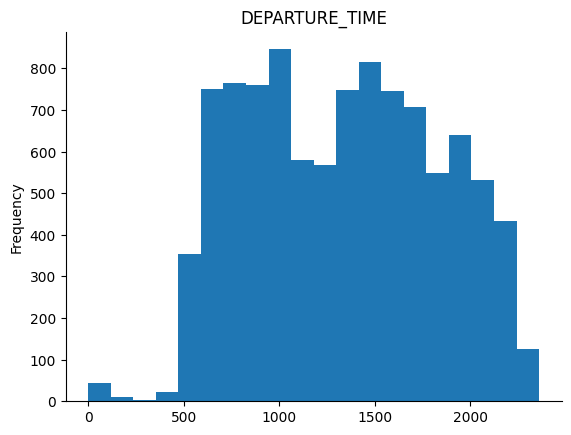

In [4]:
# @title DEPARTURE_TIME

from matplotlib import pyplot as plt
df['DEPARTURE_TIME'].plot(kind='hist', bins=20, title='DEPARTURE_TIME')
plt.gca().spines[['top', 'right',]].set_visible(False)

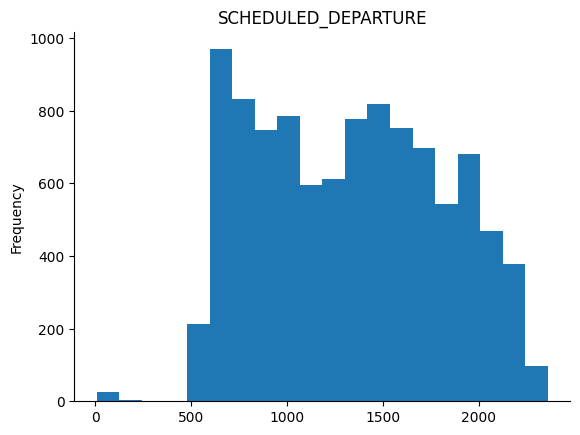

In [3]:
# @title SCHEDULED_DEPARTURE

from matplotlib import pyplot as plt
df['SCHEDULED_DEPARTURE'].plot(kind='hist', bins=20, title='SCHEDULED_DEPARTURE')
plt.gca().spines[['top', 'right',]].set_visible(False)